<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

# 1 Введение в машинное обучение

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

### 1.1 Начало

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### О "Машинном обучении"
- Машинное обучение - это часть общего направления "Искусственный интеллект".
- Машинное обучение целесообразно применять в сложно формализуемых задачах, где классические математические методы не дают желаемого эффекта.
- Любой построенный алгоритм машинного обучения - это компьютерная программа.
- Машинное обучение связано с построением обучаемых алгоритмов и способами их обучения.

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Категории задач машинного обучения и их описания

- Классификация - это отнесение образа к тому или иному классу.
- Регрессия - это построение, как правило, численных прогнозов.
- Ранжирование - это упорядочивание данных по некоторым критериям.
- Ообучение - это настройка алгоритма под определенные данные (чтобы входные данные соответствовали заданным выходным значениям).

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Виды (способы) обучения, применяемые в машинном обучени
- Обучение без учителя.
- Обучение с подкреплением.
- Обучение с учителем.

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Об обучающей выборке
- Размер обучающей выборки - это количество образов (входных данных) в выборке.
- Чем больше размер обучающей выборки, тем лучше с ее помощью можно обучить алгоритмы.
- Обучающая выборка - это набор входных данных (образов) и соответствующих целевых значений.
- Формирование обучающей выборки, зачастую, очень трудоемкая (по времени) задача.

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Пример некоторых задач, характерных для алгоритмов машинного обучения
- Создание deepfake (дипфейков).
- Автоматическое управление автомобилем, кораблем, самолетом.
- Автоматический перевод с одного языка на другой.
- Стилизация изображений и видео.
- Прохождение компьютерных игр.
- Генерация текстов, изображений, звуков.

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

### 1.4 Линейная модель. Понятие переобучения

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Cредний эмпирический риск

Программа вычисление значения среднего эмпирического риска.

Представлена выборка данных $x$, $y$ сформированная по следующей формуле: $y_i = w_0 + w_1 \cdot x_i + \epsilon_i, \quad i = 1, 2, \dots, n$, где:
- $w_0$, $w_1$ — весовые коэффициенты
- $x_i$ — аргумент
- $\epsilon_i$ — случайная величина с нулевым математическим ожиданием и постоянной дисперсией

Целевые значения $y_i$ прогнозируются с помощью параметрической модели: $a(x, w) = w_0 + w_1 \cdot x$, с параметрами $w_0 = 0.5$ и $w_1 = -0.3$.

Используемая квадратическая функция потерь: $\text{loss}(a, y_i) = (a(x_i, w) - y_i)^2$.

Вычислить в программе значение среднего эмпирического риска: $Q(a, X) = \frac{1}{n} \cdot \sum_{i=1}^{n} \text{loss}(a, y_i)$.

In [6]:
# Средний эмпирический риск
# Импорт библиотек
import numpy as np

np.random.seed(0)  # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)

# Массив значений x от -1 до 1 с шагом 0.1
x = np.arange(-1.0, 1.0, 0.1)

# Размер выборки и коэффициенты (веса) модели
size_train = len(x)
w = np.array([0.5, -0.3])

# Модель линейной регрессии
def model_a(x, w):
    return w[1] * x + w[0]

# Квадратическую функцию потерь
def loss(ax, y):
    return (ax - y) ** 2

# Генерируем целевые значения y для модели с добавлением нормального шума
y = model_a(x, w) + np.random.normal(0, 0.1, size_train)

# Вычисляем предсказанные значения
predictions = model_a(x, w)

# Вычисляем квадратическую функцию потерь для всего массива
losses = loss(predictions, y)

# Вычисляем средний эмпирический риск
Q = np.mean(losses)

# Результат
print(f'Средний эмпирический риск: Q = {Q}')

Средний эмпирический риск: Q = 0.010469526728196498


In [ ]:
import numpy as np

np.random.seed(0)  # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx) # модель
Y = -5.2 + 0.7 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xi] for xi in x])
w = np.power(X.T@X, -1)@X.T@Y
print(w)

In [ ]:
import numpy as np

np.random.seed(0) # псевдослучайные числа образуют одну и ту же последовательность (при каждом запуске)
x = np.arange(-1.0, 1.0, 0.1) # аргумент [-1; 1] с шагом 0,1


model_a = lambda xx, ww: (ww[0] + ww[1] * xx + ww[2] * xx ** 2 + ww[3] * xx ** 3) # модель
Y = np.sin(x * 5) + 2 * x + np.random.normal(0, 0.1, len(x)) # вектор целевых значений

X = np.array([[1, xx, xx**2, xx**3] for xx in x]) # обучающая выборка для поиска коэффициентов w модели a

w = np.linalg.solve(X.T@X, X.T@Y)
print(w)

In [ ]:
import sympy as sp

# Координаты точек
points = [[7, 5], [-3, 5]]

# Объявляем переменные
w1, w2 = sp.symbols('w1 w2')  # символьные переменные для коэффициентов w1 и w2
w0 = 5  # допустим, что смещение w0 = 3

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in points]

# Решаем систему уравнений для w1 и w2
solution = sp.solve(equations, (w1, w2))

print(f'w = [{w0}, {solution[w1]}, {solution[w2]}]')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Координаты точек
points = [[7, 5], [-3, 5]]

# Объявляем переменные
w1, w2 = sp.symbols('w1 w2')  # символьные переменные для коэффициентов w1 и w2
w0 = -5  # смещение w0

# Составляем уравнения на основе координат точек
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in points]

# Решаем систему уравнений для w1 и w2
solution = sp.solve(equations, (w1, w2))

w1_value = solution[w1]
w2_value = solution[w2]

# Определяем диапазон значений x для построения прямой
x_values = np.linspace(-10, 10, 400)
y_values = - (w1_value * x_values + w0) / w2_value

# Создаем график
plt.figure(figsize=(10, 10))  # Размер графика можно настроить по вашему усмотрению
plt.plot(x_values, y_values, label=f'Прямая: {w1_value:.2f}x1 + {w2_value:.2f}x2 + {w0} = 0')

# Отмечаем точки
x_coords, y_coords = zip(*points)
plt.scatter(x_coords, y_coords, color='red', zorder=5)
for (x, y) in points:
    plt.text(x, y, f'({x}, {y})', fontsize=12, verticalalignment='bottom')

# Настройки графика
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('График прямой')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()

# Устанавливаем равные масштабы для осей
plt.axis('equal')

# Настраиваем метки осей с шагом 1
plt.xticks(np.arange(-10, 11, 1))  # Устанавливаем метки оси x от -10 до 10 с шагом 1
plt.yticks(np.arange(-10, 11, 1))  # Устанавливаем метки оси y от -10 до 10 с шагом 1

plt.show()

In [10]:
import numpy as np

def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

def a(x, w):
    return w[0] + w[1] * x + w[2] * x**2 + w[3] * np.cos(2*x) + w[4] * np.sin(2*x)

coord_x = np.arange(-5.0, 5.0, 0.1) # значения отсчетов по оси абсцисс
coord_y = func(coord_x) # значения функции по оси ординат

sz = len(coord_x) # общее число отсчетов

w = np.array([-1.59, -0.69, 0.278, 0.497, -0.106])
Q = np.sum(np.abs(a(coord_x, w) - coord_y)) / sz
# print(f'Q = {Q}')

Q = 0.9250026294525024


In [226]:
import numpy as np

data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), 
          (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), 
          (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), 
          (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), 
          (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), 
          (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), 
          (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), 
          (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), 
          (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), 
          (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), 
          (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), 
          (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), 
          (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), 
          (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), 
          (6.0, 1.5), (5.9, 1.8)]

data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 
          1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 
          1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, 
          -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, 
          -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

# Добавляем единичный столбец для смещения (w0)
X = np.array([[1, x1, x2] for x1, x2 in data_x])
y = np.array(data_y)

# Вычисляем параметры w
w = np.sum(X.T * y, axis=1) @ np.linalg.inv(X.T @ X)
print(f'w = {list(w)}')

w = [-3.313070620936521, 0.006174531035906039, 1.9537026894926461]


In [6]:
import numpy as np

def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.1 * x ** 3

def df(x):
    return 0.5 + 0.4 * x - 0.3 * x ** 2

coord_x = np.arange(-5.0, 5.0, 0.1)  # значения по оси абсцисс
coord_y = func(coord_x)  # значения по оси ординат (значения функции)

# Начальные параметры
eta = 0.01  # шаг градиентного спуска
x = -4  # начальное значение x0
N = 200  # количество итераций

for n in range(N):
    x -= eta * df(x)

# print(f'x = {x}')

x = -1.0758987284245605


In [116]:
import numpy as np

# Исходная функция, которую нужно аппроксимировать моделью a(x, w)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

# Функция аппроксимации
def a(X, w):
    return X @ w

# Вычисление градиента
def gradient(X, y, w):
    return 2 * np.mean((X @ w - y).reshape(-1, 1) * X, axis=0)

# Начальные значения
coord_x = np.arange(-5.0, 5.0, 0.1)  # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x)  # значения функции по оси ординат

X = np.array([[1, x, x**2, x**3] for x in coord_x])
y = coord_y

eta = np.array([0.1, 0.01, 0.001, 0.0001])  # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])  # начальные значения параметров модели
N = 200  # число итераций градиентного алгоритма

# Градиентный спуск
for n in range(N):
    w -= eta * gradient(X, y, w)

Q = np.mean(np.square(a(X, w) - y))
print(f'w = {list(w)}\nQ = {Q}')

w = [4.986457387535088, -0.41780963958067896, 0.10273087874160171, 0.031724695628790815]
Q = 0.13061463936073706


In [185]:
import numpy as np

# Исходная функция, которую нужно аппроксимировать моделью a(x, w)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

# Функция аппроксимации
def a(X, w):
    return X @ w

# Вычисление градиента
def gradient(X, y, w):
    return 2 * (X @ w - y) * X if X.ndim == 1 else (2 / X.shape[0]) * ((X @ w - y) @ X.T)

# Начальные значения
coord_x = np.arange(-5.0, 5.0, 0.1)  # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x)  # значения функции по оси ординат

X = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x])
y = coord_y

sz = len(coord_x)  # количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.])  # начальные значения параметров модели
N = 500  # число итераций алгоритма SGD
lm = 0.02  # значение параметра лямбда для вычисления скользящего экспоненциального среднего

Qe = 0  # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

# Градиентный спуск
for n in range(N):
    k = np.random.randint(0, sz-1)  # sz - размер выборки (массива coord_x)
    w -= eta * gradient(X[k], y[k], w)

    # Обновление экспоненциального скользящего среднего
    Lk = np.square(a(X[k], w) - y[k])
    Qe = lm * Lk + (1 - lm) * Qe

Q = np.mean(np.square(a(X, w) - y))
print(f'Q = {Q}\nQe = {Qe}')

Q = 1.43883862496245
Qe = 1.0708299961076067


In [194]:
import numpy as np

# Исходная функция, которую нужно аппроксимировать моделью a(x, w)
def func(x):
    return 0.5 * x**2 - 0.1 * 1/np.exp(-x) + 0.5 * np.cos(2*x) - 2.

# Функция аппроксимации
def a(X, w):
    return X @ w

# Вычисление градиента
def gradient(X, y, w):
    return 2 * np.mean((X @ w - y).reshape(-1, 1) * X, axis=0)

# Начальные значения
coord_x = np.arange(-5.0, 5.0, 0.1)  # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x)  # значения функции по оси ординат

X = np.array([[1, x, x**2, np.cos(2*x), np.sin(2*x)] for x in coord_x])
y = coord_y

sz = len(coord_x)  # количество значений функций (точек)
eta = np.array([0.01, 0.001, 0.0001, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.array([0., 0., 0., 0., 0.])  # начальные значения параметров модели
N = 500  # число итераций алгоритма SGD
lm = 0.02  # значение параметра лямбда для вычисления скользящего экспоненциального среднего

Qe = 0  # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

# Градиентный спуск
for n in range(N):
    k = np.random.randint(0, sz-1)  # sz - размер выборки (массива coord_x)
    w -= eta * gradient(X[k], y[k], w)

    # Обновление экспоненциального скользящего среднего
    Lk = np.square(a(X[k], w) - y[k])
    Qe = lm * Lk + (1 - lm) * Qe

Q = np.mean(np.square(a(X, w) - y))
# print(f'Q = {Q}\nQe = {Qe}')

Q = 1.43883862496245
Qe = 1.0708299961076067


In [182]:
import numpy as np

# Исходная функция, которую нужно аппроксимировать моделью a(x, w)
def func(x):
    return 0.1 * x**2 - np.sin(x) + 5.

# Функция аппроксимации
def a(X, w):
    return X @ w

# Вычисление градиента
def gradient(X, y, w):
    return 2 * np.mean((X @ w - y).reshape(-1, 1) * X, axis=0)

# Начальные значения
coord_x = np.arange(-5.0, 5.0, 0.1)  # значения по оси абсцисс [-5; 5] с шагом 0.1
coord_y = func(coord_x)  # значения функции по оси ординат

X = np.array([[1, x, x**2, x**3] for x in coord_x])
y = coord_y

eta = np.array([0.1, 0.01, 0.001, 0.0001])  # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])  # начальные значения параметров модели
N = 200  # число итераций градиентного алгоритма

# Градиентный спуск
for n in range(N):
    w -= eta * gradient(X, y, w)

Q = np.mean(np.square(a(X, w) - y))
print(f'w = {list(w)}\nQ = {Q}')

w = [4.986457387535088, -0.41780963958067896, 0.10273087874160171, 0.031724695628790815]
Q = 0.13061463936073706


In [225]:
import numpy as np

# Исходная функция, которую нужно аппроксимировать моделью a(x, w)
def func(x):
    return 0.5 * x + 0.2 * x**2 - 0.05 * x**3 + 0.2 * np.sin(4*x) - 2.5

# Функция аппроксимации
def a(X, w):
    return X @ w

# Вычисление градиента
def gradient(X, y, w):
    return 2 * np.mean((X @ w - y).reshape(-1, 1) * X, axis=0)

# Начальные значения
coord_x = np.arange(-4.0, 6.0, 0.1)  # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x)  # значения функции по оси ординат

X = np.array([[1, x, x**2, x**3] for x in coord_x])
y = coord_y

sz = len(coord_x)  # количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001])  # шаг обучения для каждого параметра w0, w1, w2, w3
w = np.array([0., 0., 0., 0.])  # начальные значения параметров модели
N = 500  # число итераций алгоритма SGD
lm = 0.02  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 50  # размер мини-батча (величина K = 50)

Qe = 0  # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

# Градиентный спуск
for n in range(N):
    k = np.random.randint(0, sz-batch_size-1)  # sz - размер выборки (массива coord_x)
    X_batch = X[k:k+batch_size]
    y_batch = y[k:k+batch_size]
    w -= eta * gradient(X_batch, y_batch, w)

    # Обновление экспоненциального скользящего среднего
    Lk = np.mean(np.square(a(X_batch, w) - y_batch))
    Qe = lm * Lk + (1 - lm) * Qe

Q = np.mean(np.square(a(X, w) - y))
# print(f'Q = {Q}\nQe = {Qe}')

Q = 0.02038708547914085
Qe = 0.02008596800838947


In [337]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

X_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(X_train)  # размер обучающей выборки
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])   # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000  # число итераций алгоритма SGD

Qe = 0
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

for n in range(N):
    k = np.random.randint(0, n_train-1)
    Qk = loss(w, X_train[k], y_train[k])
    Qe = lm * Qk+ (1 - lm) * Qe
    w -= nt * df(w, X_train[k], y_train[k])
    
Q = (X_train @ w * y_train < 0).mean()
print(f'w = {list(w)}\nQ = {Q}\nQe = {Qe}')

w = [-8.155534013725282, -0.1565627430848718, 1.7824006940696886]
Q = 0.07
Qe = 0.5639288362213944


In [340]:
import numpy as np

# Экспоненциальная функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.exp(-M)

# Производная экспоненциальной функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x.T) * y
    return -np.exp(-M) * x.T * y

data_x = [(5.8, 1.2), (5.6, 1.5), (6.5, 1.5), (6.1, 1.3), (6.4, 1.3), (7.7, 2.0), (6.0, 1.8), (5.6, 1.3), (6.0, 1.6), (5.8, 1.9), (5.7, 2.0), (6.3, 1.5), (6.2, 1.8), (7.7, 2.3), (5.8, 1.2), (6.3, 1.8), (6.0, 1.0), (6.2, 1.3), (5.7, 1.3), (6.3, 1.9), (6.7, 2.5), (5.5, 1.2), (4.9, 1.0), (6.1, 1.4), (6.0, 1.6), (7.2, 2.5), (7.3, 1.8), (6.6, 1.4), (5.6, 2.0), (5.5, 1.0), (6.4, 2.2), (5.6, 1.3), (6.6, 1.3), (6.9, 2.1), (6.8, 2.1), (5.7, 1.3), (7.0, 1.4), (6.1, 1.4), (6.1, 1.8), (6.7, 1.7), (6.0, 1.5), (6.5, 1.8), (6.4, 1.5), (6.9, 1.5), (5.6, 1.3), (6.7, 1.4), (5.8, 1.9), (6.3, 1.3), (6.7, 2.1), (6.2, 2.3), (6.3, 2.4), (6.7, 1.8), (6.4, 2.3), (6.2, 1.5), (6.1, 1.4), (7.1, 2.1), (5.7, 1.0), (6.8, 1.4), (6.8, 2.3), (5.1, 1.1), (4.9, 1.7), (5.9, 1.8), (7.4, 1.9), (6.5, 2.0), (6.7, 1.5), (6.5, 2.0), (5.8, 1.0), (6.4, 2.1), (7.6, 2.1), (5.8, 2.4), (7.7, 2.2), (6.3, 1.5), (5.0, 1.0), (6.3, 1.6), (7.7, 2.3), (6.4, 1.9), (6.5, 2.2), (5.7, 1.2), (6.9, 2.3), (5.7, 1.3), (6.1, 1.2), (5.4, 1.5), (5.2, 1.4), (6.7, 2.3), (7.9, 2.0), (5.6, 1.1), (7.2, 1.8), (5.5, 1.3), (7.2, 1.6), (6.3, 2.5), (6.3, 1.8), (6.7, 2.4), (5.0, 1.0), (6.4, 1.8), (6.9, 2.3), (5.5, 1.3), (5.5, 1.1), (5.9, 1.5), (6.0, 1.5), (5.9, 1.8)]
data_y = [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, 1, -1, -1, -1, -1, 1]

X_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(X_train)  # n_train - размер выборки (массива X_train)
w = [0.0, 0.0, 0.0]  # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])  # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01  # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 500  # число итераций алгоритма SGD
batch_size = 10  # размер мини-батча (величина K = 10)

Qe = loss(w, X_train.T, y_train).mean()  # начальное значение среднего эмпирического риска
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

for n in range(N):
    k = np.random.randint(0, n_train-batch_size-1)
    X_batch = X_train[k:k+batch_size]
    y_batch = y_train[k:k+batch_size]

    Qk = loss(w, X_batch.T, y_batch).mean()  # усеченный эмпирический риск (эмпирический риск на текущем мини-батче)
    Qe = lm * Qk + (1 - lm) * Qe  # экспоненциальное скользящее среднее эмпирического риска
    w -= nt * df(w, X_batch, y_batch).mean(axis=1)  # обновление весов по среднему градиенту на мини-батче
    
Q = (X_train @ w * y_train < 0).mean()  # средний эмпирический риск
print(f'w = {list(w)}\nQe = {Qe}\nQ = {Q}')

w = [-3.9936802253097503, 0.3485064933316406, 1.0787939190959954]
Qe = 0.7092738058526213
Q = 0.07


In [341]:
import numpy as np
import sympy as sp

# Координаты точек прямой
p1, p2 = [5, 0], [-1, 4]

# Находим угловой коэффициент k и смещение b (w0)
# k = sp.oo угловой коэффициент стремится к бесконечности
# x = w0 (x1 = w0) будет уравнением линии
k, w0 = np.polyfit([p1[0], p2[0]], [p1[1], p2[1]], 1) if p1[0] != p2[0] else np.inf, p1[0]

# Объявляем символьные переменные для коэффициентов w1, w2
w1, w2 = sp.symbols('w1 w2')

# Составляем уравнения на основе координат точек: w1*x1 + w2*x2 + w0 = 0
equations = [sp.Eq(w1*x1 + w2*x2 + w0, 0) for x1, x2 in [p1, p2]]

# Решаем систему уравнений для w1, w2 и w0
solution = sp.solve(equations, (w1, w2))

w = [w0, solution[w1], solution[w2]]
print(f'w = {w}')

w = [5, -1, -3/2]


In [ ]:
import numpy as np

# логарифмическая функция потерь
def loss(w, x, y):
    M = np.dot(w, x) * y
    return np.log2(1 + np.exp(-M))

# производная логарифмической функции потерь по вектору w
def df(w, x, y):
    M = np.dot(w, x) * y
    return -(np.exp(-M) * x.T * y) / ((1 + np.exp(-M)) * np.log(2))

data_x = [(3.0, 4.9), (2.7, 3.9), (3.0, 5.5), (2.6, 4.0), (2.9, 4.3), (3.1, 5.1), (2.2, 4.5), (2.3, 3.3), (2.7, 5.1), (3.3, 5.7), (2.8, 5.1), (2.8, 4.9), (2.5, 4.5), (2.8, 4.7), (3.2, 4.7), (3.2, 5.7), (2.8, 6.1), (3.6, 6.1), (2.8, 4.8), (2.9, 4.5), (3.1, 4.9), (2.3, 4.4), (3.3, 6.0), (2.6, 5.6), (3.0, 4.4), (2.9, 4.7), (2.8, 4.0), (2.5, 5.8), (2.4, 3.3), (2.8, 6.7), (3.0, 5.1), (2.3, 4.0), (3.1, 5.5), (2.8, 4.8), (2.7, 5.1), (2.5, 4.0), (3.1, 4.4), (3.8, 6.7), (3.1, 5.6), (3.1, 4.7), (3.0, 5.8), (3.0, 5.2), (3.0, 4.5), (2.7, 4.9), (3.0, 6.6), (2.9, 4.6), (3.0, 4.6), (2.6, 3.5), (2.7, 5.1), (2.5, 5.0), (2.0, 3.5), (3.2, 5.9), (2.5, 5.0), (3.4, 5.6), (3.4, 4.5), (3.2, 5.3), (2.2, 4.0), (2.2, 5.0), (3.3, 4.7), (2.7, 4.1), (2.4, 3.7), (3.0, 4.2), (3.2, 6.0), (3.0, 4.2), (3.0, 4.5), (2.7, 4.2), (2.5, 3.0), (2.8, 4.6), (2.9, 4.2), (3.1, 5.4), (2.5, 4.9), (3.2, 5.1), (2.8, 4.5), (2.8, 5.6), (3.4, 5.4), (2.7, 3.9), (3.0, 6.1), (3.0, 5.8), (3.0, 4.1), (2.5, 3.9), (2.4, 3.8), (2.6, 4.4), (2.9, 3.6), (3.3, 5.7), (2.9, 5.6), (3.0, 5.2), (3.0, 4.8), (2.7, 5.3), (2.8, 4.1), (2.8, 5.6), (3.2, 4.5), (3.0, 5.9), (2.9, 4.3), (2.6, 6.9), (2.8, 5.1), (2.9, 6.3), (3.2, 4.8), (3.0, 5.5), (3.0, 5.0), (3.8, 6.4)]
data_y = [1, -1, 1, -1, -1, 1, -1, -1, -1, 1, 1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, 1, -1, 1, -1, -1, -1, -1, 1, -1, -1, -1, -1, -1, -1, 1, -1, 1, -1, 1, 1, -1, 1, 1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, 1]

X_train = np.array([[1, x[0], x[1]] for x in data_x])
y_train = np.array(data_y)

n_train = len(X_train)              # размер обучающей выборки
w = [0.0, 0.0, 0.0]                 # начальные весовые коэффициенты
nt = np.array([0.5, 0.01, 0.01])    # шаг обучения для каждого параметра w0, w1, w2
lm = 0.01                           # значение параметра лямбда для вычисления скользящего экспоненциального среднего
N = 1000                            # число итераций алгоритма SGD

Qe = 0
np.random.seed(0)  # генерация одинаковых последовательностей псевдослучайных чисел

for n in range(N):
    k = np.random.randint(0, n_train-1)
    Qk = loss(w, X_train[k], y_train[k])
    Qe = lm * Qk+ (1 - lm) * Qe
    w -= nt * df(w, X_train[k], y_train[k])
    
Q = (X_train @ w * y_train < 0).mean()
print(f'w = {list(w)}\nQ = {Q}\nQe = {Qe}')

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

### 2.4 Оптимизаторы градиентных алгоритмов: RMSProp, AdaDelta, Adam

- Оптимизаторы позволяют сгладить траекторию движения к точке минимума функции в градиентных алгоритмах.
- Оптимизаторы предназначены для преодоления градиентными алгоритмами локальных точек минимума.
- Оптимизаторы - это эвристики, которые хорошо себя зарекомендовали в соответствующих практических задачах.

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Примеры градиентных алгоритмов

Работу градиентных алгоритмов в общем виде можно записать так: $w_n = w_{n-1} - S$, где $S$ — некоторое корректирующее значение или вектор (если $w$ является вектором).

1. **Метод импульсов**: $S = \gamma \cdot S + \eta \cdot \nabla Q(w)$
2. **Импульс Нестерова**: $S = \gamma \cdot S + \eta \cdot \nabla Q(w - \gamma \cdot S)$
3. **RMSProp**: $G = \alpha \cdot G + (1 - \alpha) \cdot \nabla Q(w) \odot \nabla Q(w); \,\, S = \frac{\eta \cdot \nabla Q(w)}{\sqrt{G} + \epsilon}$
4. **Диагональный метод Левенберга-Марквардта**: $S = \eta \cdot \left(\frac{\partial^2 L_i(w)}{\partial w^2} + \mu \right)^{-1} \cdot \frac{\partial L_i(w)}{\partial w}$

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Градиентный спуск с оптимизацией методом импульсов

Программа поиска точки минимума функции: $f(x) = -0.5 \cdot x + 0.2 \cdot x^2 - 0.03 \cdot x^3 - 0.3 \cdot \sin(4 \cdot x)$ с помощью градиентного алгоритма с методом импульсов: $v = \gamma \cdot v + (1 - \gamma) \cdot \eta \cdot \frac{df(x)}{dx}$, где: $x_n = x_{n-1} - v$, со следующими параметрами и начальными значениями:
- $\eta = 0.1$ - коэффициент обучения
- $x_0 = -3.5$ - начальное значение $x$
- $N = 200$ — число итераций градиентного алгоритма
- $\gamma = 0.8$ - коэффициент импульса
- $v = 0$ — начальное значение импульса

Это выражение: $v = \gamma \cdot v + (1 - \gamma) \cdot \eta \cdot \frac{df(x)}{dx}$ представляет собой **импульс (momentum)** в градиентном спуске.

Объяснение:
- **$\gamma \cdot v$**: Здесь $v$ — это накопленный импульс, а $\gamma$ — коэффициент, который определяет, какая часть предыдущего импульса будет сохранена. Это придает алгоритму инерцию и позволяет ему продолжать двигаться в том же направлении, смягчая колебания.
- **$(1 - \gamma) \cdot \eta \cdot \frac{df(x)}{dx}$**: Эта часть формулы отвечает за вычисление градиента текущей функции потерь $f(x)$ с учетом шага обучения $\eta = 0.1$. Новый градиент добавляется к накопленному импульсу.

Таким образом, $v$ в этой формуле — это комбинация предыдущего импульса и текущего градиента, что помогает ускорить обучение и улучшить сходимость, особенно в задачах с узкими и длинными долинами, где простой градиентный спуск может застрять.

In [392]:
# Градиентный спуск с оптимизацией методом импульсов
# Импорт библиотек
import numpy as np

# Исходная функция
def func(x):
    return -0.5 * x + 0.2 * x ** 2 - 0.03 * x ** 3 - 0.3 * np.sin(4 * x)

# Производная функции
def df(x):
    return -0.5 + 0.4 * x - 0.09 * x ** 2 - 1.2 * np.cos(4 * x)

# Заданные параметры
eta = 0.1    # коэффициент обучения
x = -3.5     # начальное значение x
N = 200      # число итераций градиентного алгоритма
gamma = 0.8  # коэффициент импульса
v = 0        # начальное значение импульса

# Градиентный спуск
for epoch in range(N):
    v = gamma * v + (1 - gamma) * eta * df(x)  # градиент с импульсом
    x -= v

# Результат
print(f'Точка остановки с импульсом: x = {x}')

Точка остановки с импульсом: x = 0.46321887819001595


<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Градиентный спуск без метода импульсов

In [389]:
# Градиентный спуск без метода импульсов
x_simple = -3.5  # начальное значение x для сравнения

# Градиентный спуск
for epoch in range(N):
    x_simple -= eta * df(x_simple)

# Результат
print(f'Точка остановки без импульса: x_simple = {x_simple}')

Точка остановки без импульса: x_simple = -0.9465345999520599


<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### График градиентного спуска с методом импульсов и без него

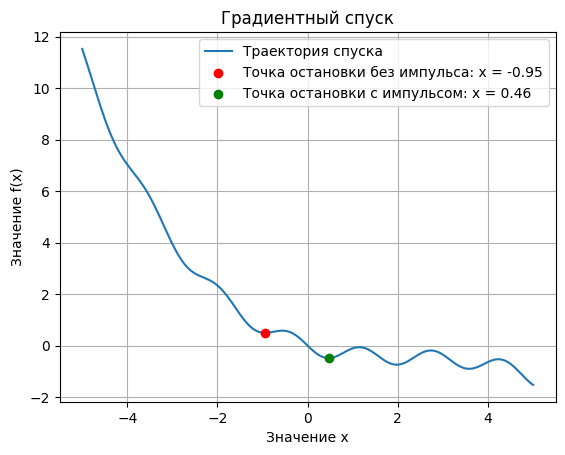

In [388]:
# Построение графика
# Импорт библиотек
from matplotlib import pyplot as plt

# Создаем диапазон значений x
x_values = np.linspace(-5, 5, N)  # N точек от -5 до 5

# Вычисляем значения функции
f_values = func(x_values)

# Рисуем график
plt.grid(True)
plt.title("Градиентный спуск")
plt.xlabel("Значение x")
plt.ylabel("Значение f(x)")
plt.plot(x_values, f_values, label="Траектория спуска")
plt.scatter(x_simple, func(x_simple), color='red', label=f"Точка остановки без импульса: x = {x_simple:.2f}", zorder=2)
plt.scatter(x, func(x), color='green', label=f"Точка остановки с импульсом: x = {x:.2f}", zorder=2)
plt.legend()
plt.show()

<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### Градиентный спуск с оптимизацией методом импульсов Нестерова

Программа поиска точки минимума функции: $f(x) = 0.4 \cdot x + 0.1 \cdot \sin(2 \cdot x) + 0.2 \cdot \cos(3 \cdot x)$ с помощью градиентного алгоритма с методом импульсов Нестерова: $v = \gamma \cdot v + (1 - \gamma) \cdot \eta \cdot \frac{df(x - \gamma \cdot v)}{dx}$, где: $x_n = x_{n-1} - v$ со следующими параметрами и начальными значениями:

- $\eta = 1.0$ — коэффициент обучения
- $x_0 = 4.0$ — начальное значение $x$
- $N = 500$ — число итераций градиентного алгоритма
- $\gamma = 0.7$ — коэффициент импульса
- $v = 0$ — начальное значение импульса

Объяснение:
- **$\gamma \cdot v$**: Импульс от предыдущих итераций, который сохраняется частично в текущем импульсе. Это помогает сгладить колебания.
- **$(1 - \gamma) \cdot \eta \cdot \frac{df(x - \gamma \cdot v)}{dx}$**: Обновление градиента, учитывающее текущее положение с учетом импульса. Это добавляет к импульсу градиент, вычисленный в новом месте.

Таким образом, данный метод позволяет адаптивно корректировать направление и скорость изменения параметров, улучшая сходимость алгоритма градиентного спуска.

In [8]:
# Градиентный спуск с оптимизацией методом импульсов Нестерова
# Импорт библиотек
import numpy as np

# Исходная функция
def func(x):
    return 0.4 * x + 0.1 * np.sin(2 * x) + 0.2 * np.cos(3 * x)

# Производная функции
def df(x):
    return 0.4 + 0.2 * np.cos(2 * x) - 0.6 * np.sin(3 * x)

# Заданные параметры
eta = 1.0    # коэффициент обучения
x = 4.0      # начальное значение x
N = 500      # число итераций градиентного алгоритма
gamma = 0.7  # коэффициент импульса
v = 0        # начальное значение импульса

# Градиентный спуск с методом импульсов Нестерова
for _ in range(N):
    v = gamma * v + (1 - gamma) * eta * df(x - gamma * v)   # градиент с импульсом
    x -= v

# Результат
print(f'Точка минимума: x = {x}')

Точка минимума: x = 0.8117183975270703


In [11]:
# Градиентный спуск без метода импульсов Нестерова
x_simple = 4.0  # начальное значение x для сравнения

# Градиентный спуск
for epoch in range(N):
    x_simple -= eta * df(x_simple)

# Результат
print(f'Точка остановки без импульса: x_simple = {x_simple}')

Точка остановки без импульса: x_simple = 2.7617998135169746


<link rel="stylesheet" type="text/css" href="../data/styles/styles.css">

##### График градиентного спуска с методом импульсов Нестерова и без него

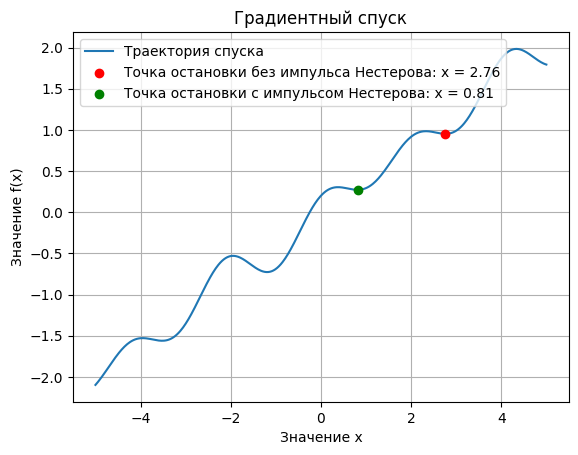

In [13]:
# Построение графика
# Импорт библиотек
from matplotlib import pyplot as plt

# Создаем диапазон значений x
x_values = np.linspace(-5, 5, N)  # N точек от -5 до 5

# Вычисляем значения функции
f_values = func(x_values)

# Рисуем график
plt.grid(True)
plt.title("Градиентный спуск")
plt.xlabel("Значение x")
plt.ylabel("Значение f(x)")
plt.plot(x_values, f_values, label="Траектория спуска")
plt.scatter(x_simple, func(x_simple), color='red', label=f"Точка остановки без импульса Нестерова: x = {x_simple:.2f}", zorder=2)
plt.scatter(x, func(x), color='green', label=f"Точка остановки с импульсом Нестерова: x = {x:.2f}", zorder=2)
plt.legend()
plt.show()